In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

C:\Users\Michael Liu\AppData\Local\Temp\ipykernel_19460\57172879.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#import all datasets
df_train = pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')
df_gender_submission = pd.read_csv('./dataset/gender_submission.csv')

### 1. Datapreprocessing

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [6]:
df_train['Sex'] = df_train['Sex'].replace({'male': 1, 'female': 0})
df_test['Sex'] = df_test['Sex'].replace({'male': 1, 'female': 0})
df_train

C:\Users\Michael Liu\AppData\Local\Temp\ipykernel_19460\2920772974.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Sex'] = df_train['Sex'].replace({'male': 1, 'female': 0})
C:\Users\Michael Liu\AppData\Local\Temp\ipykernel_19460\2920772974.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Sex'] = df_test['Sex'].replace({'male': 1, 'female': 0})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [7]:
df_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df_train['Embarked'] = df_train['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})
df_test['Embarked'] = df_test['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


C:\Users\Michael Liu\AppData\Local\Temp\ipykernel_19460\2063987576.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Embarked'] = df_train['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})
C:\Users\Michael Liu\AppData\Local\Temp\ipykernel_19460\2063987576.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Embarked'] = df_test['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})


In [9]:
# drop all features which with object Datatype
df = df_train.drop(columns= ['Name', 'Ticket', 'Cabin'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


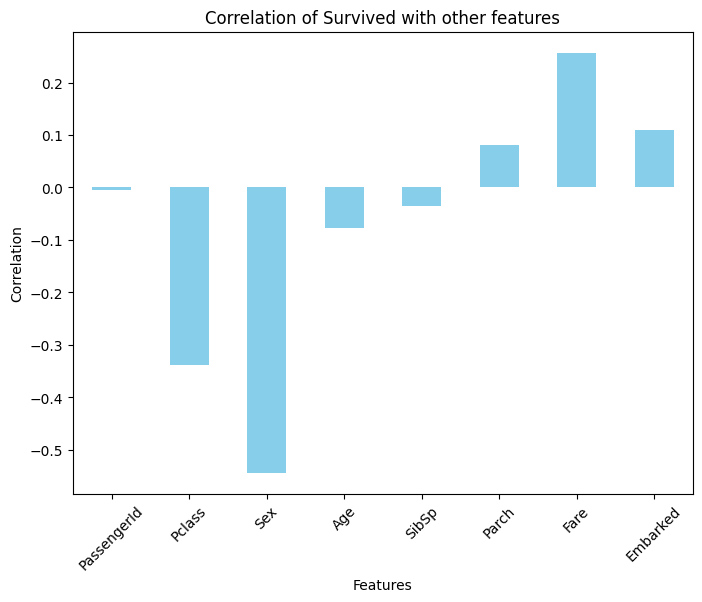

In [11]:
# goal feature: Survived
target_feature = 'Survived'
# correlation coefficient
correlation_with_target = df.corr()[target_feature].drop(target_feature)
# bar chart
plt.figure(figsize=(8, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title(f'Correlation of {target_feature} with other features')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

##### Therefore, Pclass, Sex, and Fare are highly relevant to survival. We can initially try using these three features to determine if our model can accurately predict survival. If successful, we can then attempt to refine the model by using only Pclass and Sex, or even further, only the Sex feature, to achieve accurate predictions.

In [12]:
columns = ['Pclass','Sex','Fare', 'Survived']
trainset = df_train[columns]

In [13]:
trainset

,Pclass,Sex,Fare,Survived
0,3,1,7.2500,0
1,1,0,71.2833,1
2,3,0,7.9250,1
3,1,0,53.1000,1
4,3,1,8.0500,0
...,...,...,...,...
886,2,1,13.0000,0
887,1,0,30.0000,1
888,3,0,23.4500,0
889,1,1,30.0000,1


In [14]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Fare      891 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 28.0 KB


In [15]:
columns = ['Pclass','Sex','Fare']
testset = df_test[columns]

In [16]:
testset[testset.Fare.isna()]

,Pclass,Sex,Fare
152,3,1,NaN


In [17]:
# Storey, Mr. Thomas comes from Pclass 3, in order to fill his missing value on Fare, give him the average value of all Passenger with 3 Pclass
testset[testset.Pclass == 3].Fare.mean()

12.459677880184334

In [18]:
testset.iloc[152, testset.columns.get_loc('Fare')] = testset[testset.Pclass == 3].Fare.mean()
testset.iloc[152,:]

Pclass     3.000000
Sex        1.000000
Fare      12.459678
Name: 152, dtype: float64

In [19]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Fare    418 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.9 KB


### 2. Modelling

In [22]:
columns = ['Pclass','Sex','Fare']
X_train = trainset[columns]
y_train = trainset.Survived
X_test = testset
y_test = df_gender_submission.Survived
# SVM classifier
svm_classifier = SVC(kernel='linear')
# train
svm_classifier.fit(X_train, y_train)
# predict
y_pred = svm_classifier.predict(X_test)
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [23]:
columns = ['Pclass','Sex']
X_train1 = trainset[columns]
y_train1 = trainset.Survived
X_test1 = testset[columns]
y_test1 = df_gender_submission.Survived
# SVM classifier
svm_classifier = SVC(kernel='linear')
# train
svm_classifier.fit(X_train1, y_train1)
# predict
y_pred1 = svm_classifier.predict(X_test1)
# accuracy
accuracy = accuracy_score(y_test1, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [21]:
columns = ['Sex']
X_train = trainset[columns]
y_train = trainset.Survived
X_test = testset[columns]
y_test = df_gender_submission.Survived
# SVM classifier
svm_classifier = SVC(kernel='linear')
# train
svm_classifier.fit(X_train, y_train)
# predict
y_pred = svm_classifier.predict(X_test)
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


### 3. Evaluation

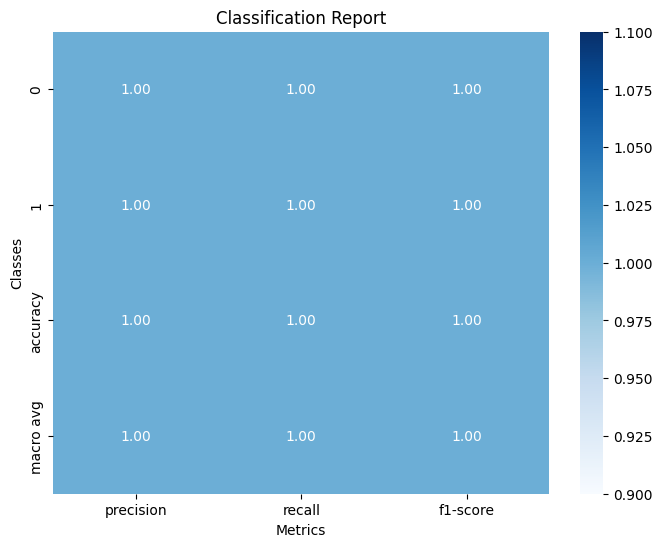

In [23]:
class_report_dict = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).transpose()
# hotmap for classification report
plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

*The training dataset had a significant number of missing values overall, along with numerous features that were not of numeric data types. By initially reducing dimensionality, many features were excluded, resulting in a smaller set of features with fewer missing values. Consequently, there was no need to invest excessive time in handling missing values. The outcome revealed that using only the 'sex' feature was sufficient to train a model with a precision of 1. Given the simplicity of the task, a basic SVM model was employed. Furthermore, since only one feature needed to be trained, the model training time was also rapid. While there are many other models and methods available, this approach proved to be the most economical and expedient means of achieving the objective. In conclusion, employing an SVM classifier to train solely on the 'sex' feature yields a model with a precision of 1.*